In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("1. Regression - Module - (Housing Prices).csv")
data

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,NaN,...,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,NaN,...,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,NaN,...,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,NaN,...,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


# FEATURE PROCESSING

# Performing feature transformation

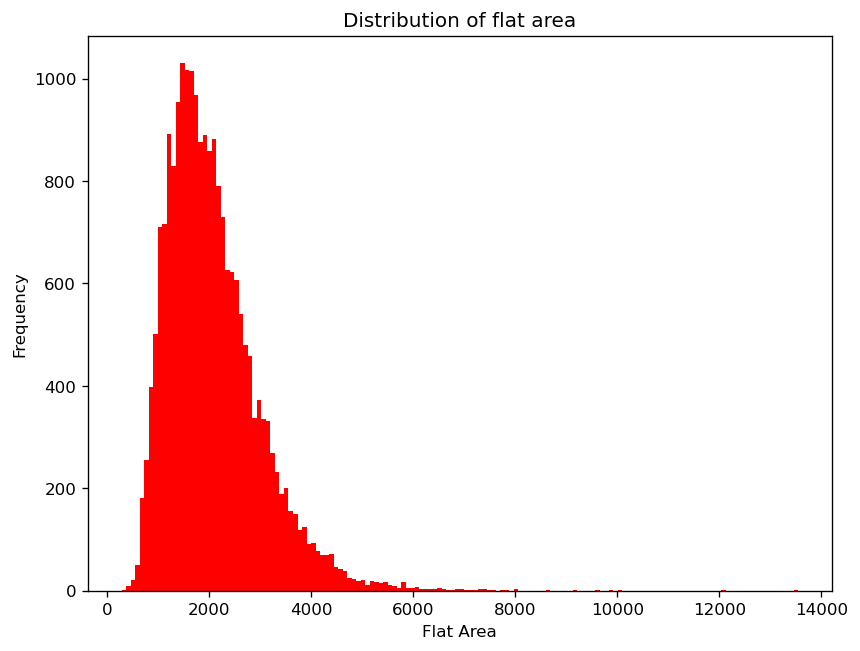

In [4]:
plt.figure( dpi = 120, figsize = (8,6))
plt.hist(data["Flat Area (in Sqft)"] , bins = 150, color = "red")
plt.xlabel("Flat Area")
plt.ylabel("Frequency")
plt.title("Distribution of flat area")
plt.show()

In [5]:
def log_transform(data):
    return np.log(data)
    
data["Transformed_flat_area"] = data["Flat Area (in Sqft)"].map(log_transform)

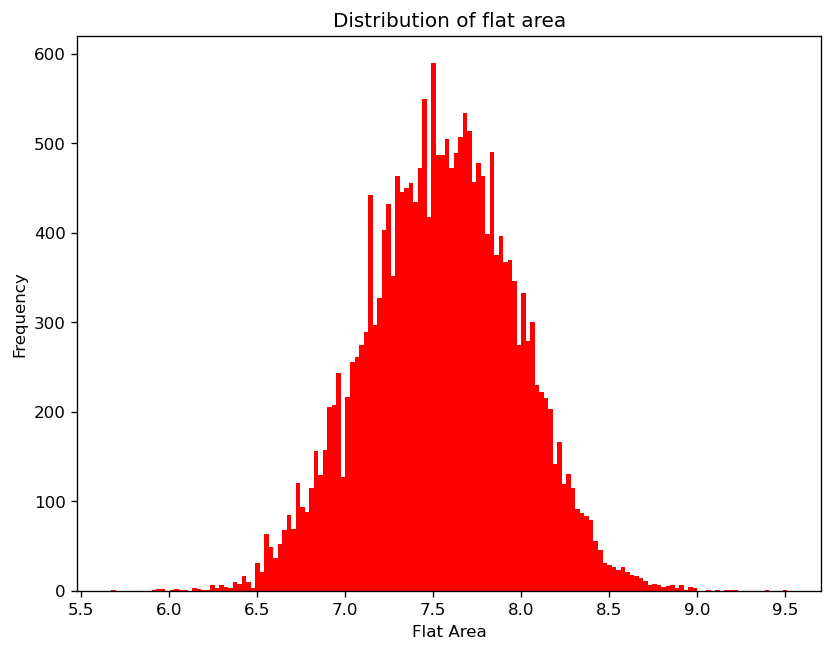

In [6]:
plt.figure( dpi = 120, figsize = (8,6))
plt.hist(data["Transformed_flat_area"] , bins = 150, color = "red")
plt.xlabel("Flat Area")
plt.ylabel("Frequency")
plt.title("Distribution of flat area")
plt.show()

In [7]:
label_encoded = data["Condition of the House"]
label_encoded.value_counts()

Condition of the House
Fair         14031
Good          5679
Excellent     1701
Okay           172
Bad             30
Name: count, dtype: int64

In [8]:
label_encoded = label_encoded.map({"Bad":1,
                  "Okay":2,
                  "Fair":3,
                  "Good":4,
                  "Excellent":5})
label_encoded.value_counts()

Condition of the House
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64

# BINNING OF SPARSE CATEGORIES

In [9]:
data["Condition of the House"].unique()

array(['Fair', 'Excellent', 'Good', 'Bad', 'Okay'], dtype=object)

In [11]:
data["Condition of the House"].value_counts()

Condition of the House
Fair         14031
Good          5679
Excellent     1701
Okay           172
Bad             30
Name: count, dtype: int64

In [12]:
mean = []

for i in data["Condition of the House"].unique():
    mean.append(data["Sale Price"][data["Condition of the House"] == i].mean())
    
    

Text(0, 0.5, 'Mean Sale Price')

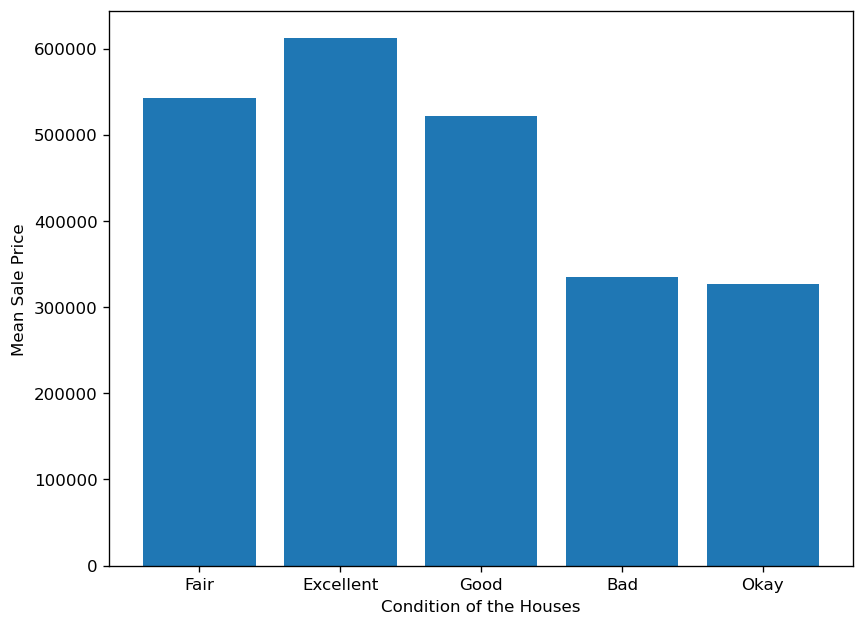

In [13]:
plt.figure( dpi = 120, figsize = (8,6))
plt.bar(data["Condition of the House"].unique(), mean)
plt.xlabel("Condition of the Houses")
plt.ylabel("Mean Sale Price")

In [20]:
mapping=({"Excellent":"Excellent",
                         "Good":"Good",
                         "Fair":"Good",
                         "Okay":"Okay",
                         "Bad":"Okay"})
data["Condition of the House"] = data["Condition of the House"].map(mapping)

In [21]:
mean = []

for i in data["Condition of the House"].unique():
    mean.append(data["Sale Price"][data["Condition of the House"] == i].mean())
    

Text(0, 0.5, 'Mean Sale Price')

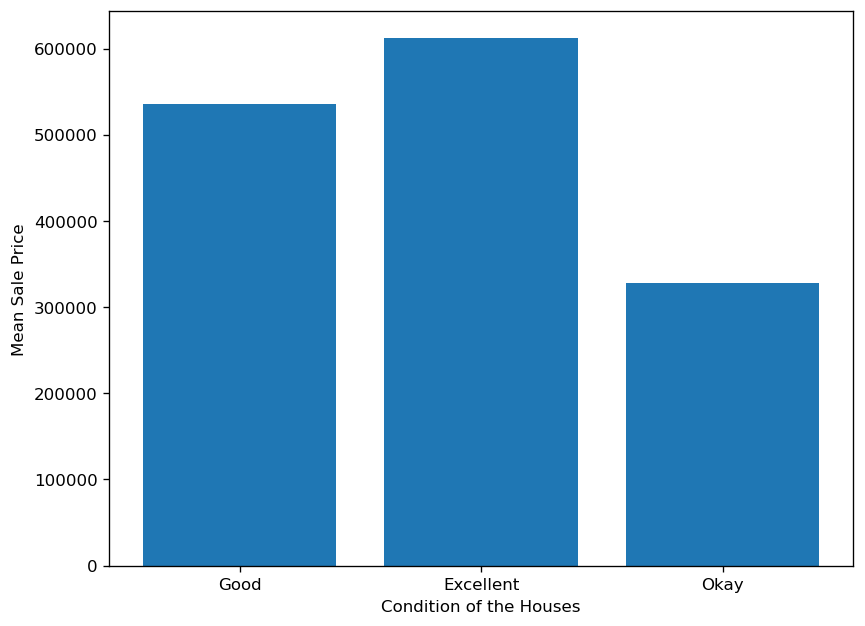

In [22]:
plt.figure( dpi = 120, figsize = (8,6))
plt.bar(data["Condition of the House"].unique(), mean)
plt.xlabel("Condition of the Houses")
plt.ylabel("Mean Sale Price")

# BINNING OF CONTINOUS VARIABLES

In [24]:
len(data["Age of House (in Years)"].unique())

116

In [25]:
data["Age of House (in Years)"].max()

118

In [26]:
data["Age of House (in Years)"].min()

3

In [27]:
def age_of_house(x):
    if x < 10:
        x = "new"
    elif 10 < x < 50:
        x = "old"
    else:
        x = "very old"
    return x 

In [28]:
data["Age of House (in Years)"].map(age_of_house)

0        very old
1        very old
2        very old
3        very old
4             old
           ...   
21608         new
21609         new
21610         new
21611         old
21612    very old
Name: Age of House (in Years), Length: 21613, dtype: object

# FEATURE GENERATION

# Feature Extraction

In [29]:
data["Date House was Sold"].head()

0     14 October 2017
1    14 December 2017
2    15 February 2016
3    14 December 2017
4    15 February 2016
Name: Date House was Sold, dtype: object

In [34]:
time = pd.DatetimeIndex(data["Date House was Sold"])
data["year_sold"] = time.year
data["month_sold"] = time.month
data["date_sold"] = time.days_in_month

data[["year_sold","month_sold", "date_sold"]].head()


,year_sold,month_sold,date_sold
0,2017,10,31
1,2017,12,31
2,2016,2,29
3,2017,12,31
4,2016,2,29
